
Statistical descriptions and Visualizations




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
data = pd.read_csv('cars.csv')

In [ ]:
# Display initial data
print('Initial Data:')
print(data.head(), "\n")

Initial Data:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc 



In [ ]:
# Display information about the DataFrame
print('Data Information:')
data.info()
print("\n")

# Check for null values
print('Null Values in Each Column:')
print(data.isnull().sum(), "\n")

# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Display statistical values for each attribute
print('Statistical Values for Each Attribute:')
print(data.describe(include='all'))
print("\n")

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Null Values in Each Column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64 

Statistical Values for Each Attribute:
       buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210




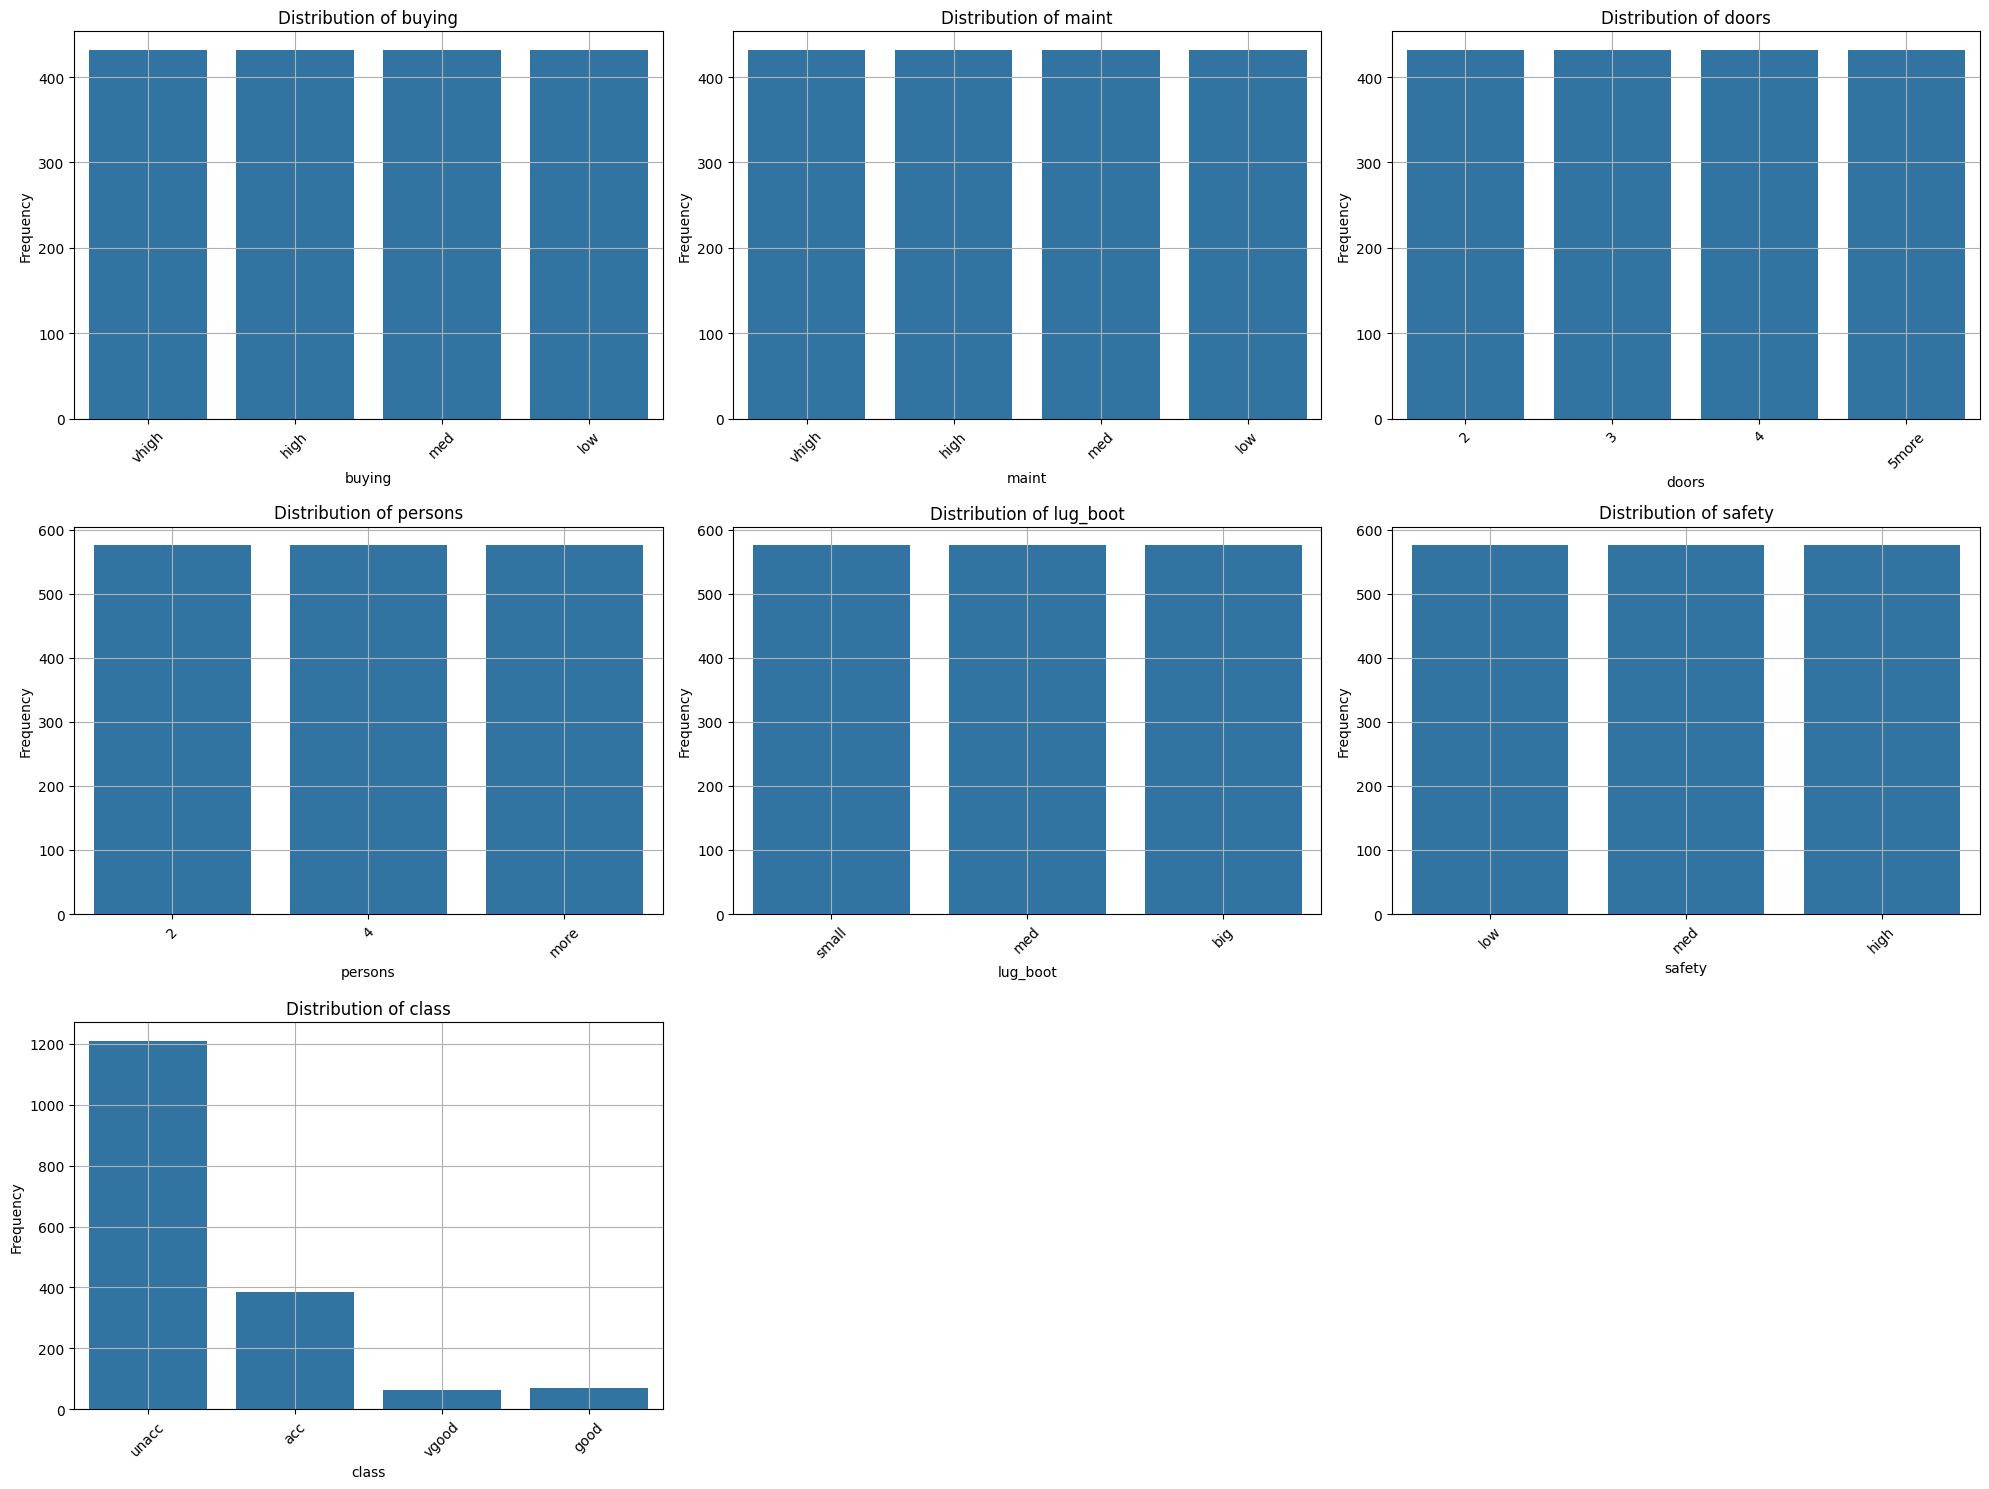

In [ ]:
# Visualize distributions for each attribute
n_cols = 3
n_rows = (len(data.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    ax = axes[i]
    if col in numeric_cols:
        sns.histplot(data=data, x=col, kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
    else:
        sns.countplot(data=data, x=col, ax=ax)
        ax.set_title(f'Distribution of {col}')
        ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Special Treatments:

In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Display encoded data
print('Encoded Data:')
print(data.head(), "\n")

Encoded Data:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2 



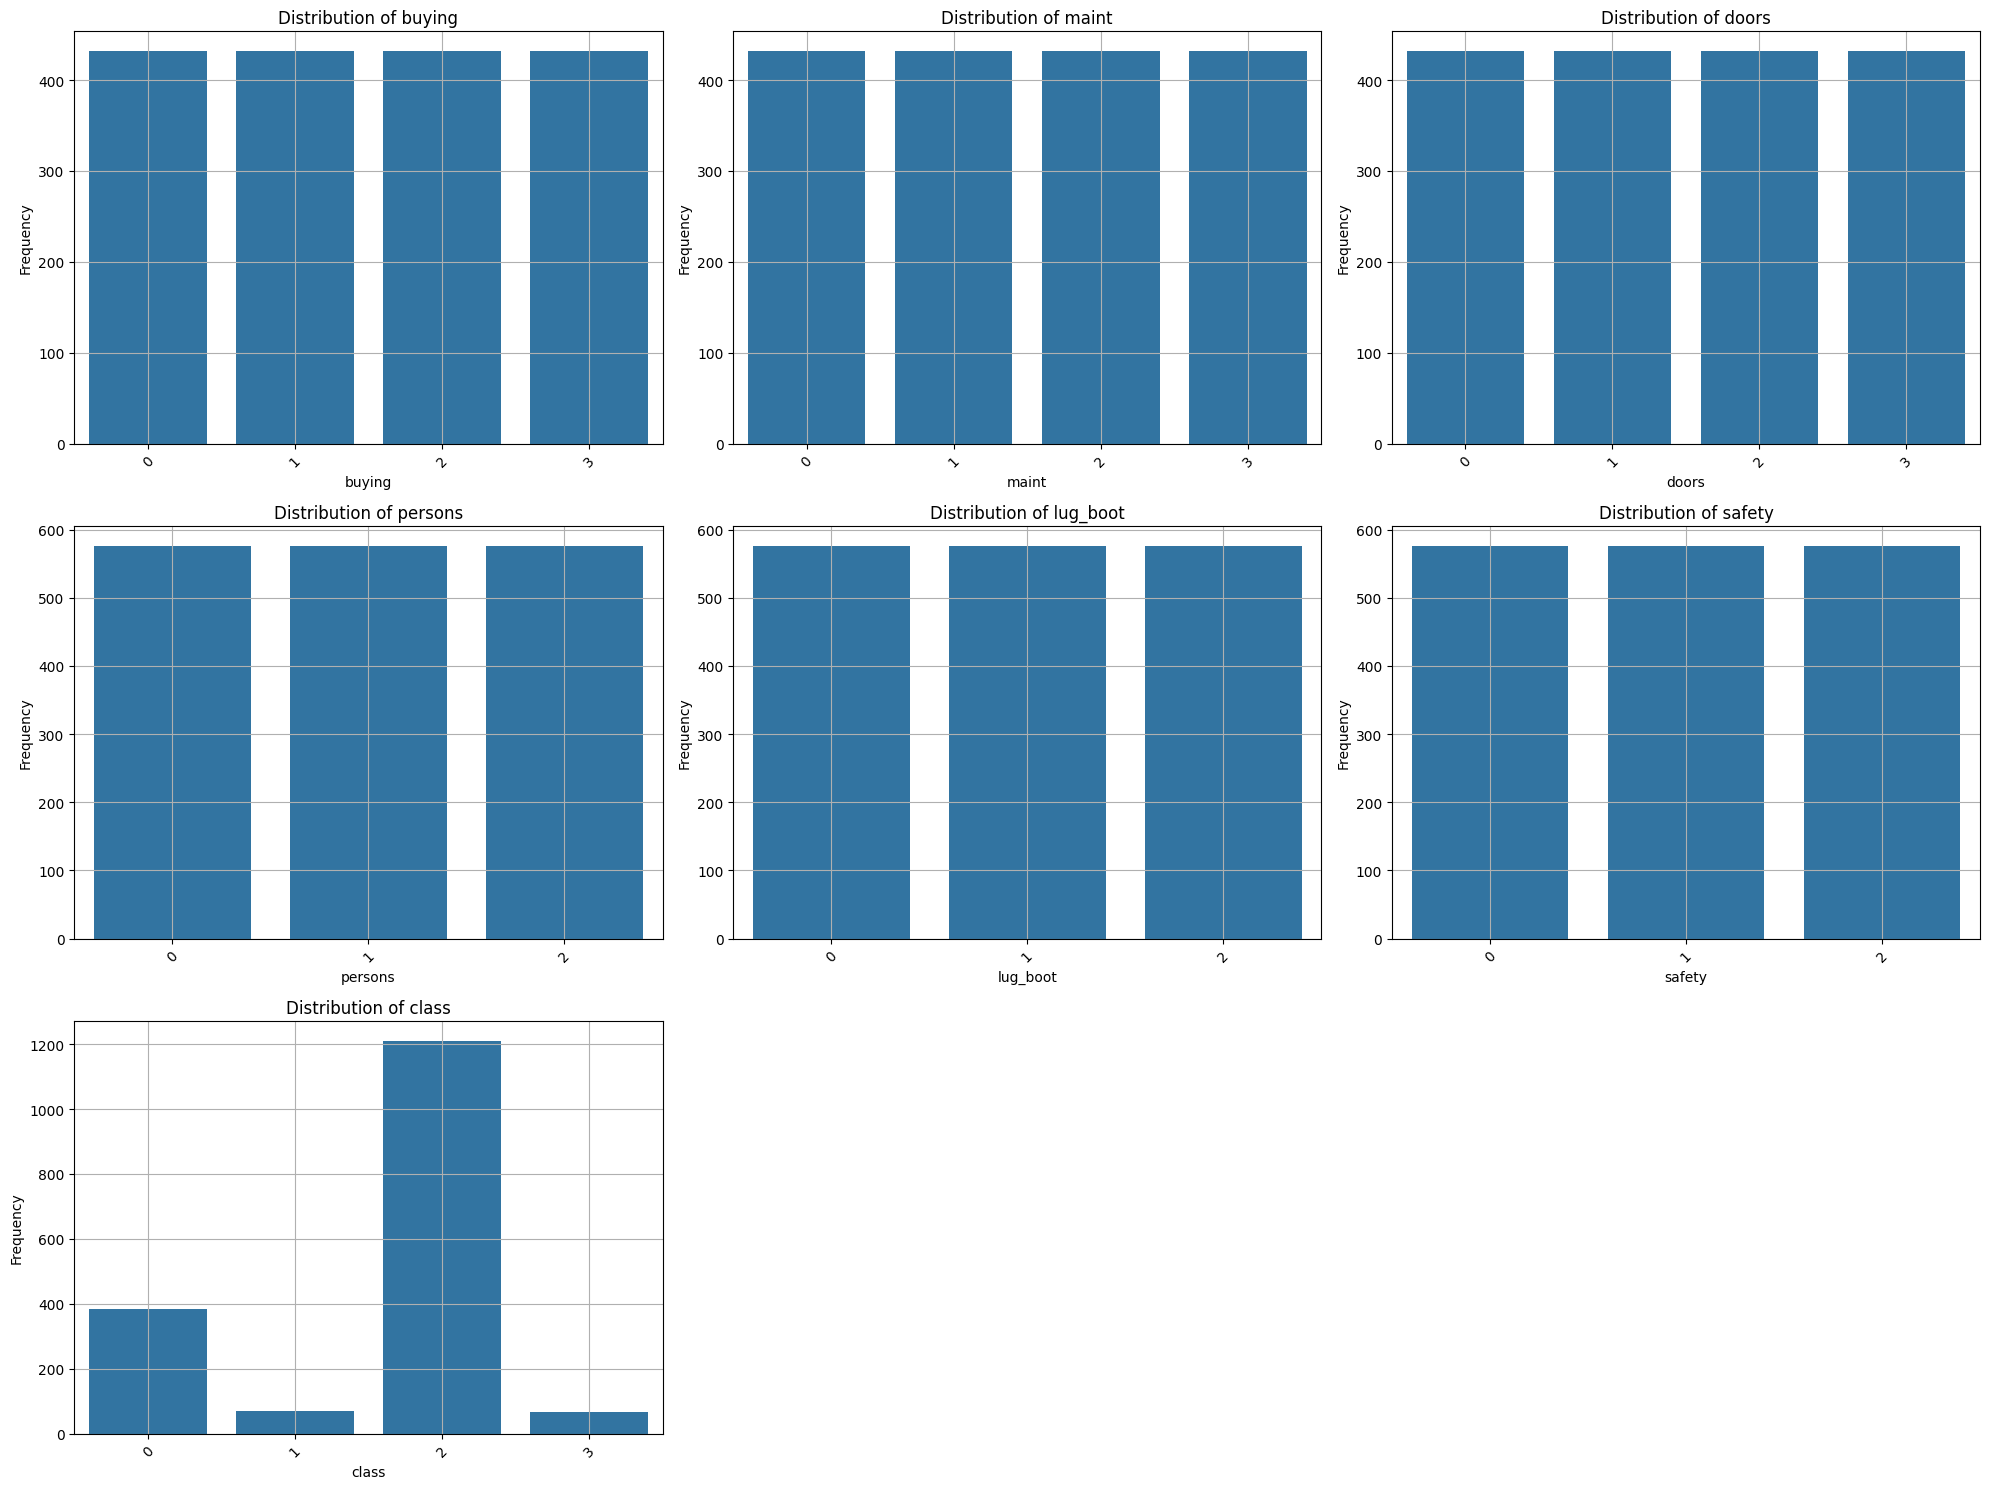

In [ ]:
# Visualize distributions for each attribute
n_cols = 3
n_rows = (len(data.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    ax = axes[i]
    if col in numeric_cols:
        sns.histplot(data=data, x=col, kde=True, ax=ax)
        ax.set_title(f'Distribution of {col}')
    else:
        sns.countplot(data=data, x=col, ax=ax)
        ax.set_title(f'Distribution of {col}')
        ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Computing the PCC

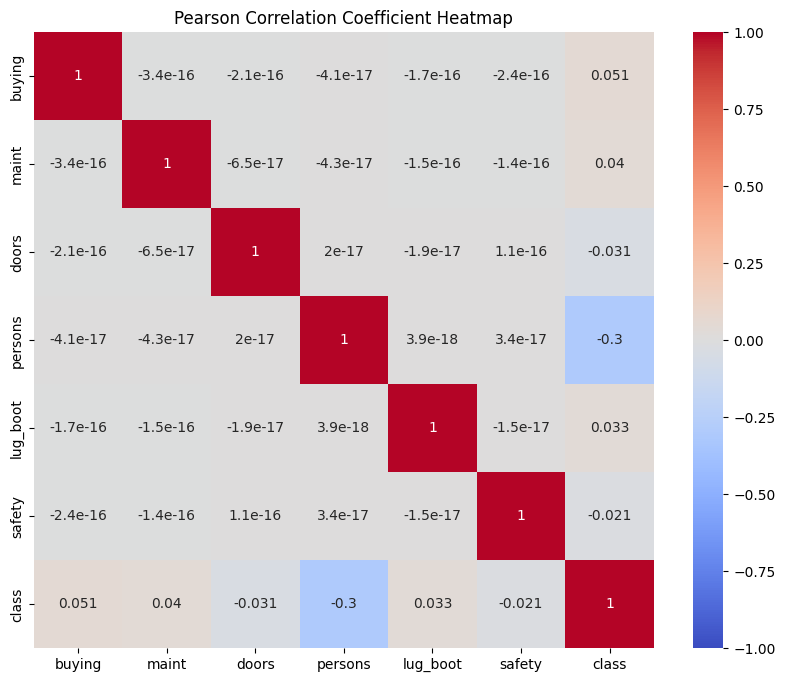

In [ ]:
# Compute the Pearson Correlation Coefficient
correlation_matrix = data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()
print("\n")

In [ ]:
# Print the correlation coefficients with the class
print("Correlation coefficients with the class:")
print(correlation_matrix['class'].sort_values(ascending=False))

Correlation coefficients with the class:
class       1.000000
buying      0.051424
maint       0.040194
lug_boot    0.033184
safety     -0.021044
doors      -0.031327
persons    -0.299468
Name: class, dtype: float64


 Scatter Plots:

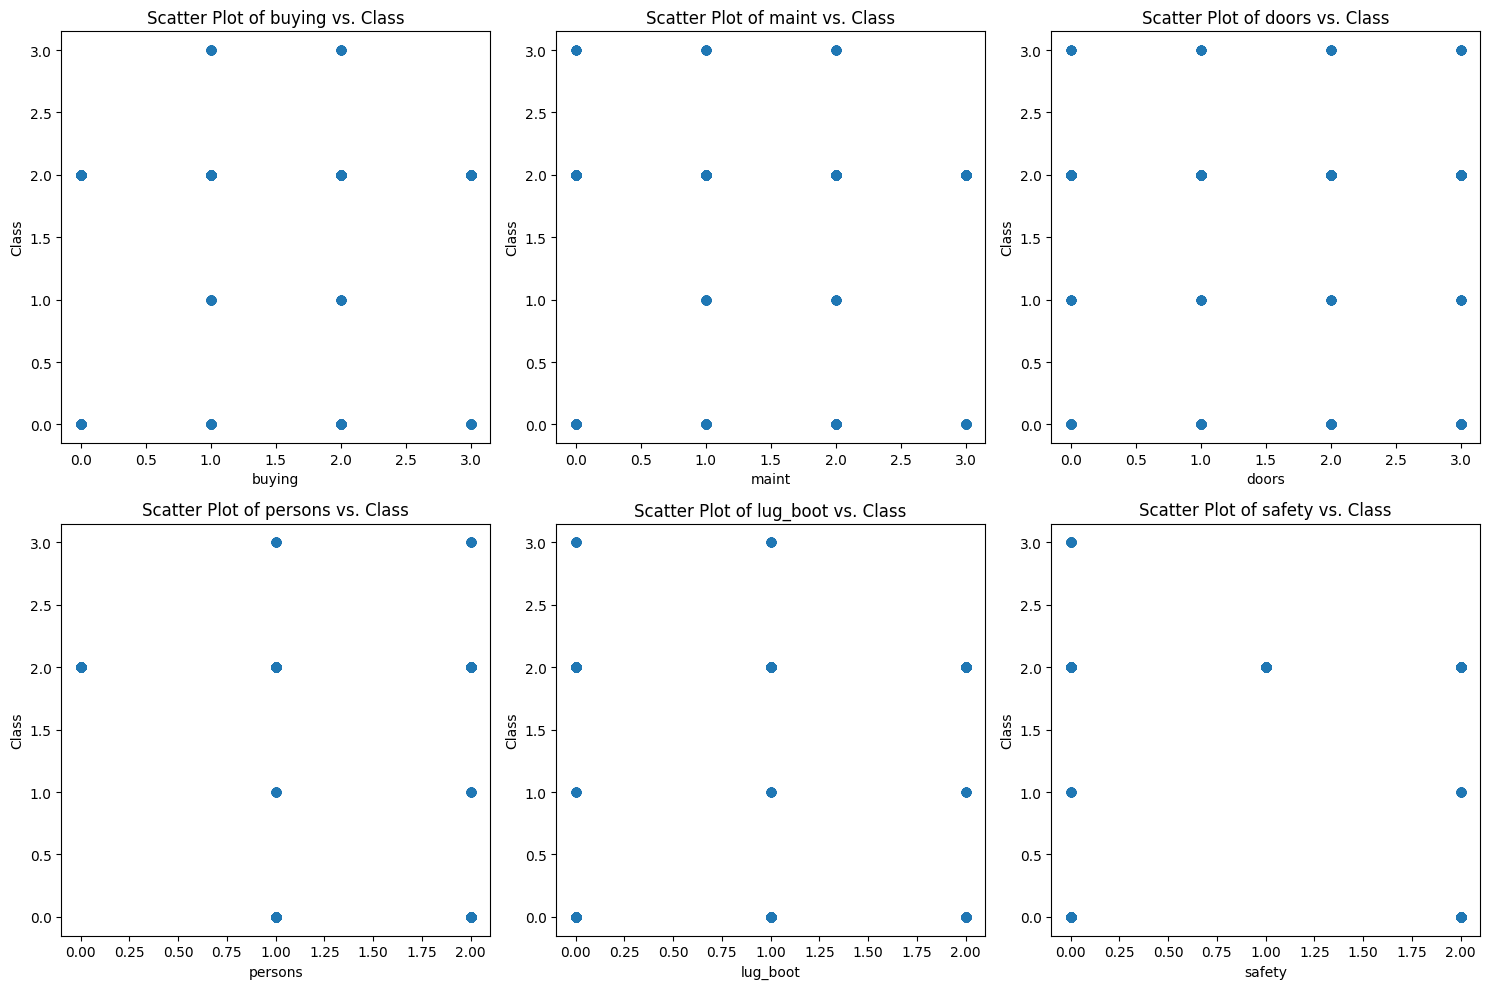

In [ ]:
# Generate scatter plots for each attribute against the class
attributes = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(attributes):
    plt.subplot(2, 3, i+1)
    plt.scatter(data[attribute], data['class'])
    plt.title(f'Scatter Plot of {attribute} vs. Class')
    plt.xlabel(attribute)
    plt.ylabel('Class')
plt.tight_layout()
plt.show()

Splitting the data in testing , validation and training sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split data into training (40%), validation (20%), and testing sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the sizes of each set
print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')


Training set size: 691
Validation set size: 518
Test set size: 519


Verification of splitting:

In [ ]:
print("Original class distribution:")
print(y.value_counts(normalize=True))
print("\nTraining class distribution:")
print(y_train.value_counts(normalize=True))
print("\nValidation class distribution:")
print(y_val.value_counts(normalize=True))
print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))


Original class distribution:
class
2    0.700231
0    0.222222
1    0.039931
3    0.037616
Name: proportion, dtype: float64

Training class distribution:
class
2    0.683068
0    0.232996
3    0.043415
1    0.040521
Name: proportion, dtype: float64

Validation class distribution:
class
2    0.718147
0    0.204633
1    0.046332
3    0.030888
Name: proportion, dtype: float64

Test class distribution:
class
2    0.705202
0    0.225434
3    0.036609
1    0.032755
Name: proportion, dtype: float64


Multinomial Linear Regression

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    metrics = {}
    for name, y_true, y_pred in [("train", y_train, train_pred),
                                 ("val", y_val, val_pred),
                                 ("test", y_test, test_pred)]:
        metrics[f"{name}_acc"] = accuracy_score(y_true, y_pred)
        metrics[f"{name}_precision"] = precision_score(y_true, y_pred, average='weighted')
        metrics[f"{name}_recall"] = recall_score(y_true, y_pred, average='weighted')
        metrics[f"{name}_f1"] = f1_score(y_true, y_pred, average='weighted')

    return metrics

# Hyperparameter grid for Multinomial Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 500]
}

log_reg = LogisticRegression(multi_class='multinomial', max_iter=200)

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model
metrics = train_and_evaluate(best_model, X_train, y_train, X_val, y_val, X_test, y_test)

# Print results
print("Best Hyperparameters:", best_params)
print("\nPerformance Metrics:")
for key in sorted(metrics.keys()):
    print(f"{key}: {metrics[key]:.4f}")

log_reg_test_accuracy = metrics['test_acc']

print("\nModel Performance:")
print(f"Training Accuracy: {metrics['train_acc']:.4f}")
print(f"Validation Accuracy: {metrics['val_acc']:.4f}")
print(f"Test Accuracy: {log_reg_test_accuracy:.4f}")

# Calculate and print the validation accuracy for the logistic regression model
log_reg_val_accuracy = grid_search.score(X_val, y_val)
print(f"\nLogistic Regression Validation Accuracy: {log_reg_val_accuracy:.4f}")

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}

Performance Metrics:
test_acc: 0.7071
test_f1: 0.6047
test_precision: 0.6072
test_recall: 0.7071
train_acc: 0.6874
train_f1: 0.5856
train_precision: 0.5696
train_recall: 0.6874
val_acc: 0.7220
val_f1: 0.6228
val_precision: 0.6246
val_recall: 0.7220

Model Performance:
Training Accuracy: 0.6874
Validation Accuracy: 0.7220
Test Accuracy: 0.7071

Logistic Regression Validation Accuracy: 0.7220


Feature Engineering and SMOTE for Mutinomial Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_r, y_train_r = smote.fit_resample(X_train_scaled, y_train)

def train_and_evaluate(model, X_train_r, y_train_r, X_val_scaled, y_val, X_test_scaled, y_test):
    model.fit(X_train_r, y_train_r)
    train_pred = model.predict(X_train_r)
    val_pred = model.predict(X_val_scaled)
    test_pred = model.predict(X_test_scaled)

    metrics = {}
    for name, y_true, y_pred in [("train", y_train_r, train_pred),
                                 ("val", y_val, val_pred),
                                 ("test", y_test, test_pred)]:
        metrics[f"{name}_acc"] = accuracy_score(y_true, y_pred)
        metrics[f"{name}_precision"] = precision_score(y_true, y_pred, average='weighted')
        metrics[f"{name}_recall"] = recall_score(y_true, y_pred, average='weighted')
        metrics[f"{name}_f1"] = f1_score(y_true, y_pred, average='weighted')

    return metrics

# Create a pipeline with feature engineering steps and logistic regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('select', SelectKBest(f_classif, k=20)),
    ('pca', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(multi_class='multinomial', max_iter=500))
])

# Hyperparameter grid for the pipeline
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'poly__degree': [1, 2, 3],
    'select__k': [10, 20, 30],
    'pca__n_components': [0.9, 0.95, 0.99]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_r, y_train_r)

# Get best model and its parameters
best_model = grid_search.best_estimator_
best_params_log_reg = grid_search.best_params_

# Evaluate the best model
metrics = train_and_evaluate(best_model, X_train_r, y_train_r, X_val_scaled, y_val, X_test_scaled, y_test)

# Print results
print("Best Hyperparameters:", best_params_log_reg)
print("\nPerformance Metrics:")
for key in sorted(metrics.keys()):
    print(f"{key}: {metrics[key]:.4f}")

log_reg_test_accuracy_r = metrics['test_acc']

print("\nModel Performance:")
print(f"Training Accuracy: {metrics['train_acc']:.4f}")
print(f"Validation Accuracy: {metrics['val_acc']:.4f}")
print(f"Test Accuracy: {log_reg_test_accuracy_r:.4f}")

# Calculate and print the validation accuracy for the best model
log_reg_val_accuracy_r = grid_search.score(X_val_scaled, y_val)
print(f"\nLogistic Regression Validation Accuracy with Feature Engineering and SMOTE: {log_reg_val_accuracy_r:.4f}")
print(f"\nLogistic Regression Validation Accuracy without Feature Engineering and SMOTE: {log_reg_val_accuracy:.4f}")

Best Hyperparameters: {'classifier__C': 100, 'classifier__solver': 'newton-cg', 'pca__n_components': 0.99, 'poly__degree': 2, 'select__k': 30}

Performance Metrics:
test_acc: 0.9518
test_f1: 0.9527
test_precision: 0.9546
test_recall: 0.9518
train_acc: 0.9963
train_f1: 0.9963
train_precision: 0.9963
train_recall: 0.9963
val_acc: 0.9672
val_f1: 0.9673
val_precision: 0.9682
val_recall: 0.9672

Model Performance:
Training Accuracy: 0.9963
Validation Accuracy: 0.9672
Test Accuracy: 0.9518

Logistic Regression Validation Accuracy with Feature Engineering and SMOTE: 0.9672

Logistic Regression Validation Accuracy without Feature Engineering and SMOTE: 0.7220


Hyperparameter Impact Discussion:
1. C (Inverse of regularization strength): The best value is 0.01.
   - Higher C values reduce regularization and may lead to overfitting.
   - Lower C values increase regularization and may help prevent overfitting.

2. Solver: The best solver is 'newton-cg'.
   - Different solvers are optimized for different dataset sizes and characteristics.

3. Max Iterations: The best value is 100.
   - Higher values allow more time to converge but increase computation time.

Support Vector Machine (SVM)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Define the model and hyperparameters to tune
param_grid = [
    {'C': [0.1, 1.0, 10.0], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['linear']},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto']}
]

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

# Function to evaluate metrics
def evaluate_model(svm_model, X_train, y_train, X_val, y_val, X_test, y_test):
    svm_model.fit(X_train, y_train)
    y_train_pred = svm_model.predict(X_train)
    y_val_pred = svm_model.predict(X_val)
    y_test_pred = svm_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    return train_accuracy, val_accuracy, test_accuracy, precision, recall, f1


# Evaluate the best model
metrics = evaluate_model(best_model, X_train, y_train, X_val, y_val, X_test, y_test)

# store value of metrics[1]
svm_val_accuracy = metrics[1]
svm_test_accuracy = metrics[2]

print("\nBest Model Performance:")
print(f"Training Accuracy: {metrics[0]:.4f}")
print(f"Validation Accuracy: {svm_val_accuracy:.4f}")
print(f"Test Accuracy: {svm_test_accuracy:.4f}")
print(f"Precision: {metrics[3]:.4f}")
print(f"Recall: {metrics[4]:.4f}")
print(f"F1 Score: {metrics[5]:.4f}")

# Evaluate all hyperparameter combinations
# print("\nPerformance for different hyperparameter combinations:")
for params in grid_search.cv_results_['params']:
    svm_model = SVC(**params)
    metrics = evaluate_model(svm_model, X_train, y_train, X_val, y_val, X_test,y_test)
    # print(f"\nParameters: {params}")
    # print(f"Training Accuracy: {metrics[0]:.4f}")
    # print(f"Validation Accuracy: {metrics[1]:.4f}")
    # print(f"Test Accuracy: {metrics[2]:.4f}")
    # print(f"Precision: {metrics[3]:.4f}")
    # print(f"Recall: {metrics[4]:.4f}")
    # print(f"F1 Score: {metrics[5]:.4f}")

# Conclusive Validation Accuracy
print(f'\nSVM  Validation Accuracy: {svm_val_accuracy:.4f}')

Best parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best model: SVC(C=10.0)

Best Model Performance:
Training Accuracy: 0.9971
Validation Accuracy: 0.9633
Test Accuracy: 0.9672
Precision: 0.9670
Recall: 0.9672
F1 Score: 0.9670

SVM  Validation Accuracy: 0.9633


using SMOTE for SVM:

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_r, y_train_r = smote.fit_resample(X_train, y_train)


# Define the model and hyperparameters to tune
param_grid = [
    {'C': [0.1, 1.0, 10.0], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['linear']},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.1, 1.0, 10.0], 'kernel': ['sigmoid'], 'gamma': ['scale', 'auto']}
]

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_r, y_train_r)

# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

# Function to evaluate metrics
def evaluate_model(svm_model, X_train_r, y_train_r, X_val, y_val, X_test, y_test):
    svm_model.fit(X_train_r, y_train_r)
    y_train_pred = svm_model.predict(X_train_r)
    y_val_pred = svm_model.predict(X_val)
    y_test_pred = svm_model.predict(X_test)

    train_accuracy = accuracy_score(y_train_r, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    return train_accuracy, val_accuracy, test_accuracy, precision, recall, f1


# Evaluate the best model
metrics = evaluate_model(best_model, X_train_r, y_train_r, X_val, y_val, X_test, y_test)

# store value of metrics[1]
svm_val_accuracy_r = metrics[1]
svm_test_accuracy_r = metrics[2]

print("\nBest Model Performance:")
print(f"Training Accuracy: {metrics[0]:.4f}")
print(f"Validation Accuracy: {svm_val_accuracy_r:.4f}")
print(f"Test Accuracy: {svm_test_accuracy_r:.4f}")
print(f"Precision: {metrics[3]:.4f}")
print(f"Recall: {metrics[4]:.4f}")
print(f"F1 Score: {metrics[5]:.4f}")

# Evaluate all hyperparameter combinations
print("\nPerformance for different hyperparameter combinations:")
for params in grid_search.cv_results_['params']:
    svm_model = SVC(**params)
    metrics = evaluate_model(svm_model, X_train_r, y_train_r, X_val, y_val, X_test,y_test)
    # print(f"\nParameters: {params}")
    # print(f"Training Accuracy: {metrics[0]:.4f}")
    # print(f"Validation Accuracy: {metrics[1]:.4f}")
    # print(f"Test Accuracy: {metrics[2]:.4f}")
    # print(f"Precision: {metrics[3]:.4f}")
    # print(f"Recall: {metrics[4]:.4f}")
    # print(f"F1 Score: {metrics[5]:.4f}")

# Conclusive Validation Accuracy
print(f'\nSVM  Validation Accuracy without using SMOTE: {svm_val_accuracy:.4f}')
print(f'\nSVM  Validation Accuracy using SMOTE: {svm_val_accuracy_r:.4f}')

Best parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
Best model: SVC(C=10.0)

Best Model Performance:
Training Accuracy: 0.9947
Validation Accuracy: 0.9691
Test Accuracy: 0.9750
Precision: 0.9754
Recall: 0.9750
F1 Score: 0.9748

Performance for different hyperparameter combinations:

SVM  Validation Accuracy without using SMOTE: 0.9633

SVM  Validation Accuracy using SMOTE: 0.9691


Hyperparameter Impact Discussion:

Best Parameters:

C: 10.0, gamma: 'scale', kernel: 'rbf'.
C (10.0) indicates a moderate level of regularization, allowing for a good fit to the training data.
gamma ('scale') sets the influence of training examples based on the number of features, which often leads to a good balance.
kernel ('rbf') (Radial Basis Function) is effective for capturing non-linear relationships between classes.

Best Model:

SVC(C=10.0): This model uses the optimal C value identified during tuning.

Parameter Grid:

The grid included combinations for various kernels:

For the RBF kernel, C was varied along with gamma settings ('scale' and 'auto').

For the Linear kernel, only C values were tested.

For the Polynomial kernel, C values were combined with different polynomial degrees (2, 3, 4).

For the Sigmoid kernel, C and gamma were again tested.

Overall, the best results were achieved with the RBF kernel, suggesting it was the most effective for the data characteristics.

Random Forest

Time taken for GridSearchCV: 58.49 seconds
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model: RandomForestClassifier(random_state=42)

Best Model Performance:
Training Accuracy: 1.0000
Validation Accuracy (rf_val_accuracy): 0.9459
Test Accuracy: 0.9518
Precision: 0.9512
Recall: 0.9518
F1 Score: 0.9497



Random Forest Validation Accuracy (rf_val_accuracy): 0.9459



Feature Importance:
Feature 2: 0.0816
Feature 4: 0.0965
Feature 1: 0.1544
Feature 0: 0.1937
Feature 3: 0.2210
Feature 5: 0.2528


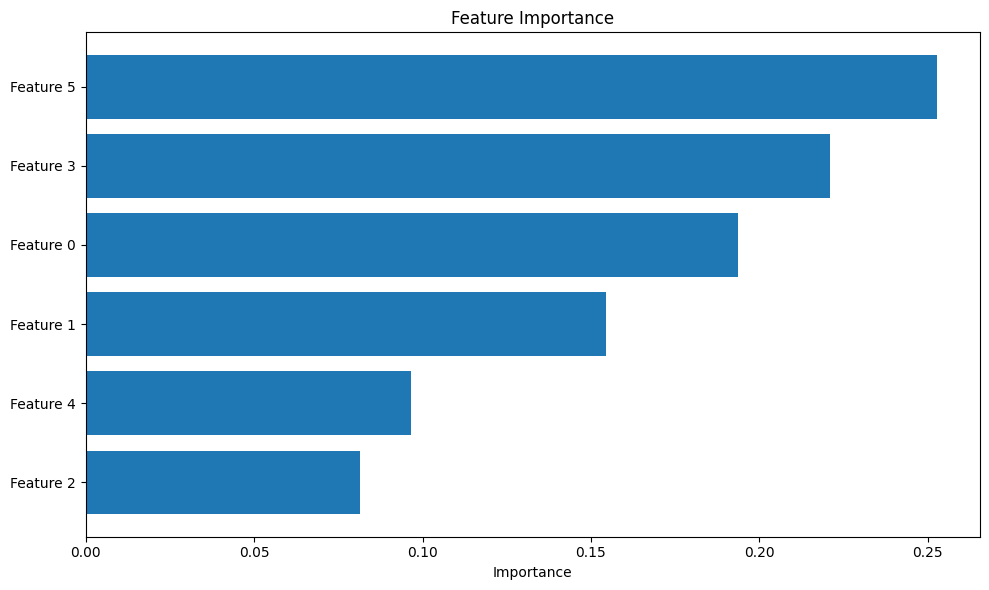

/n


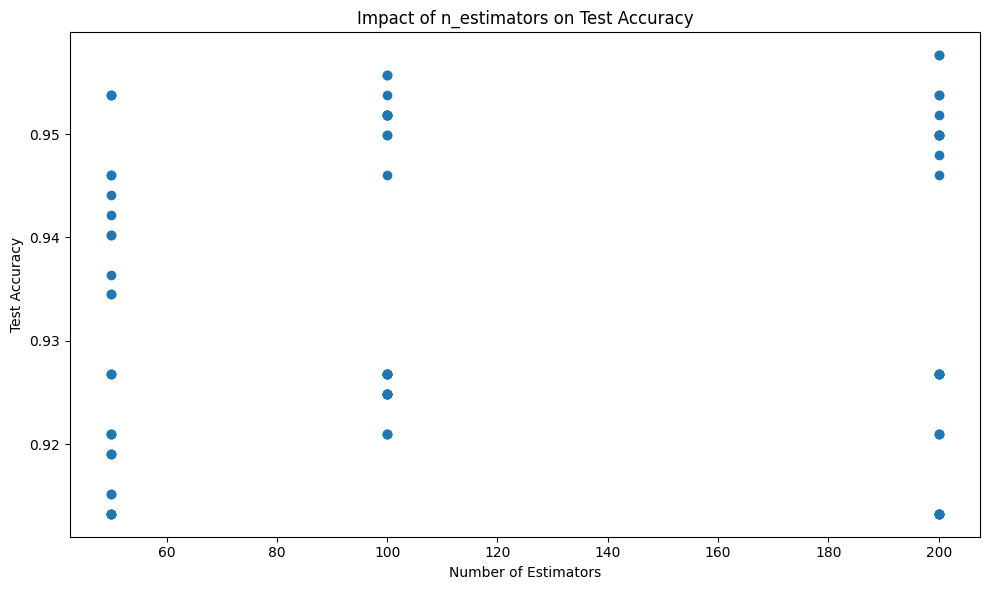

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"Time taken for GridSearchCV: {end_time - start_time:.2f} seconds")

# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

# Function to evaluate metrics
def evaluate_model(rf_model, X_train, y_train, X_val, y_val, X_test, y_test):
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    return train_accuracy, val_accuracy, test_accuracy, precision, recall, f1

# Evaluate the best model
metrics = evaluate_model(best_model, X_train, y_train, X_val, y_val, X_test, y_test)

# Store validation accuracy in rf_val_accuracy
rf_val_accuracy = metrics[1]
rf_test_accuracy = metrics[2]

print("\nBest Model Performance:")
print(f"Training Accuracy: {metrics[0]:.4f}")
print(f"Validation Accuracy (rf_val_accuracy): {rf_val_accuracy:.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Precision: {metrics[3]:.4f}")
print(f"Recall: {metrics[4]:.4f}")
print(f"F1 Score: {metrics[5]:.4f}")

# Evaluate all hyperparameter combinations
results = []
# print("\nPerformance for different hyperparameter combinations:")
for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                         grid_search.cv_results_['mean_test_score'],
                                         grid_search.cv_results_['std_test_score']):
    rf_model = RandomForestClassifier(**params, random_state=42)
    metrics = evaluate_model(rf_model, X_train, y_train, X_val, y_val, X_test, y_test)
    results.append((params, metrics))
    # print(f"\nParameters: {params}")
    # print(f"Mean CV Score: {mean_score:.4f} (+/- {std_score * 2:.4f})")
    # print(f"Training Accuracy: {metrics[0]:.4f}")
    # print(f"Validation Accuracy: {metrics[1]:.4f}")
    # print(f"Test Accuracy: {metrics[2]:.4f}")
    # print(f"Precision: {metrics[3]:.4f}")
    # print(f"Recall: {metrics[4]:.4f}")
    # print(f"F1 Score: {metrics[5]:.4f}")

print("\n")

# Print final rf_val_accuracy
print(f"\nRandom Forest Validation Accuracy (rf_val_accuracy): {rf_val_accuracy:.4f}")
print("\n")

# Analyze feature importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

print("\nFeature Importance:")
for idx in sorted_idx:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, [f"Feature {i}" for i in sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
print("/n")

# Visualize hyperparameter impact
n_estimators = [params['n_estimators'] for params, _ in results]
test_accuracies = [metrics[2] for _, metrics in results]

plt.figure(figsize=(10, 6))
plt.scatter(n_estimators, test_accuracies)
plt.title("Impact of n_estimators on Test Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.tight_layout()
plt.show()


Using SMOTE for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import time
import matplotlib.pyplot as plt

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_r, y_train_r = smote.fit_resample(X_train_scaled, y_train)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
start_time = time.time()
grid_search.fit(X_train_r, y_train_r)
end_time = time.time()

print(f"Time taken for GridSearchCV: {end_time - start_time:.2f} seconds")

# Best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best model:", best_model)

# Function to evaluate metrics
def evaluate_model(rf_model, X_train_scaled, y_train_r, X_val_scaled, y_val, X_test_scaled, y_test):
    rf_model.fit(X_train_r, y_train_r)
    y_train_pred = rf_model.predict(X_train_r)
    y_val_pred = rf_model.predict(X_val_scaled)
    y_test_pred = rf_model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train_r, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    return train_accuracy, val_accuracy, test_accuracy, precision, recall, f1

# Evaluate the best model
metrics = evaluate_model(best_model, X_train_r, y_train_r, X_val_scaled, y_val, X_test_scaled, y_test)

# Store validation accuracy in rf_val_accuracy
rf_val_accuracy_r = metrics[1]
rf_test_accuracy_r = metrics[2]

print("\nBest Model Performance:")
print(f"Training Accuracy: {metrics[0]:.4f}")
print(f"Validation Accuracy (rf_val_accuracy): {rf_val_accuracy_r:.4f}")
print(f"Test Accuracy: {rf_test_accuracy_r:.4f}")
print(f"Precision: {metrics[3]:.4f}")
print(f"Recall: {metrics[4]:.4f}")
print(f"F1 Score: {metrics[5]:.4f}")

# Evaluate all hyperparameter combinations
results = []
# print("\nPerformance for different hyperparameter combinations:")
for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                         grid_search.cv_results_['mean_test_score'],
                                         grid_search.cv_results_['std_test_score']):
    rf_model = RandomForestClassifier(**params, random_state=42)
    metrics = evaluate_model(rf_model, X_train_r, y_train_r, X_val_scaled, y_val, X_test_scaled, y_test)
    results.append((params, metrics))
    # print(f"\nParameters: {params}")
    # print(f"Mean CV Score: {mean_score:.4f} (+/- {std_score * 2:.4f})")
    # print(f"Training Accuracy: {metrics[0]:.4f}")
    # print(f"Validation Accuracy: {metrics[1]:.4f}")
    # print(f"Test Accuracy: {metrics[2]:.4f}")
    # print(f"Precision: {metrics[3]:.4f}")
    # print(f"Recall: {metrics[4]:.4f}")
    # print(f"F1 Score: {metrics[5]:.4f}")

# Print final rf_val_accuracy
print(f"\nRandom Forest Validation Accuracy (rf_val_accuracy): {rf_val_accuracy:.4f}")
print(f"\nRandom Forest Validation Accuracy with SMOTE (rf_val_accuracy_r): {rf_val_accuracy_r:.4f}")

Time taken for GridSearchCV: 62.62 seconds
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best model: RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)

Best Model Performance:
Training Accuracy: 0.9989
Validation Accuracy (rf_val_accuracy): 0.9498
Test Accuracy: 0.9383
Precision: 0.9406
Recall: 0.9383
F1 Score: 0.9377

Random Forest Validation Accuracy (rf_val_accuracy): 0.9459

Random Forest Validation Accuracy with SMOTE (rf_val_accuracy_r): 0.9498


Hyperparameters and Their Impact
n_estimators:

This hyperparameter defines the number of trees in the forest. In our grid, we tested values of 50, 100, and 200. A higher number of trees typically improves accuracy but also increases training time. Interestingly, the best model used only 50 trees, indicating that beyond a certain point, additional trees may contribute diminishing returns.
max_depth:

This controls the maximum depth of each tree. A value of None allows trees to grow until all leaves are pure. Limiting depth can help prevent overfitting, but in our case, allowing unlimited depth yielded the best result, suggesting that the dataset complexity warranted deeper trees.
min_samples_split:

This parameter specifies the minimum number of samples required to split an internal node. We chose values from 2 to 10, and the best configuration was 5. This helps prevent overfitting by ensuring that splits only occur when there is a sufficient number of samples.
min_samples_leaf:

It indicates the minimum number of samples required to be at a leaf node. A value of 1 was selected, meaning leaves can have a single sample. This can lead to overfitting, but if the model performance is satisfactory (as indicated by our metrics), it may be justified in this case.
Performance Metrics
The performance metrics we calculated (accuracy, precision, recall, F1 score) reflect a strong model, especially with a training accuracy of 99.89%. However, the validation accuracy of 94.98% and test accuracy of 93.83% indicate that while our model is performing well, there may still be room for improvement or potential overfitting.
Our metrics also highlight the importance of evaluating not just accuracy, but also precision, recall, and F1 score, particularly in imbalanced datasets.
SMOTE Impact
The use of SMOTE (Synthetic Minority Over-sampling Technique) helped address class imbalance in our training data. The validation accuracy with SMOTE (94.98%) was higher than the validation accuracy without SMOTE (94.59%). This emphasizes the benefit of balancing the classes to improve model performance.

    n_estimators  test_accuracy
0             50       0.946050
1            100       0.951830
2            200       0.957611
3             50       0.934489
4            100       0.951830
..           ...            ...
76           100       0.924855
77           200       0.913295
78            50       0.919075
79           100       0.921002
80           200       0.921002

[81 rows x 2 columns]


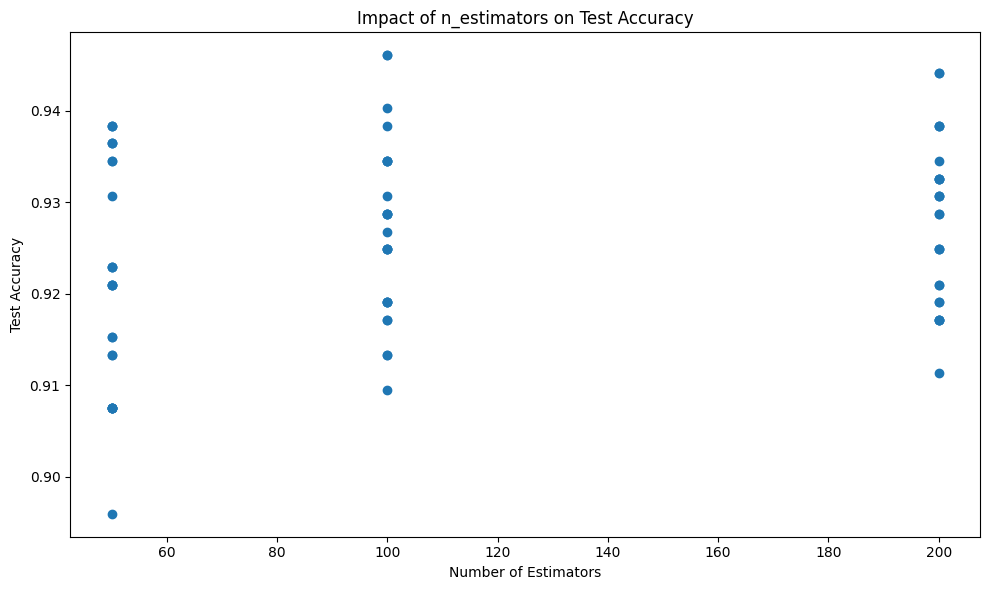

In [ ]:
import pandas as pd

results_df = pd.DataFrame({
    'n_estimators': n_estimators,
    'test_accuracy': test_accuracies
})
print(results_df)

# Visualize hyperparameter impact
n_estimators = [params['n_estimators'] for params, _ in results]
test_accuracies = [metrics[2] for _, metrics in results]

plt.figure(figsize=(10, 6))
plt.scatter(n_estimators, test_accuracies)
plt.title("Impact of n_estimators on Test Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.tight_layout()
plt.show()




Feature Importance:
Feature 2: 0.0576
Feature 3: 0.1536
Feature 4: 0.1589
Feature 1: 0.1699
Feature 0: 0.2175
Feature 5: 0.2425




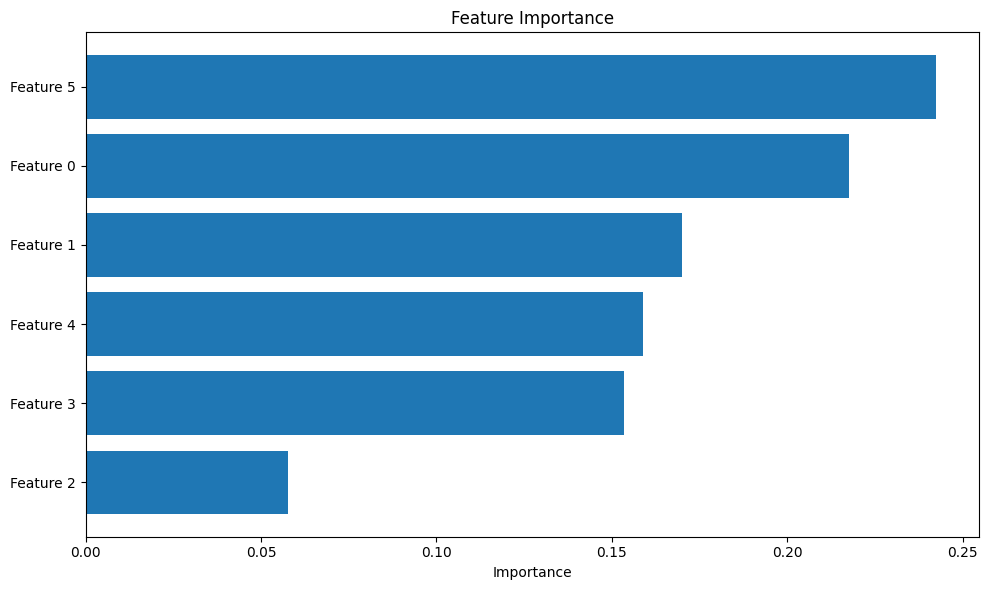

In [ ]:
# Analyze feature importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
print("\n")

print("\nFeature Importance:")
for idx in sorted_idx:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")
print("\n")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, [f"Feature {i}" for i in sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
print("\n")

Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier

# Assuming you have already trained individual models with their best hyperparameters
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', log_reg),  # Logistic Regression model
    ('svm', svm_model),    # Support Vector Machine model
    ('rf', rf_model)       # Random Forest model
], voting='hard')

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each classifier
log_reg_params = {
    'C': [100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000]
}

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create individual classifiers
log_reg = GridSearchCV(LogisticRegression(multi_class='multinomial'), log_reg_params, cv=5)
svm = GridSearchCV(SVC(probability=True), svm_params, cv=5)
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5)

# Fit individual classifiers
log_reg.fit(X_train_r, y_train_r)
svm.fit(X_train_r, y_train_r)
rf.fit(X_train_r, y_train_r)

# Create the ensemble model (Voting Classifier) with best estimators
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg.best_estimator_),
        ('svm', svm.best_estimator_),
        ('rf', rf.best_estimator_)
    ],
    voting='soft'
)

# Train the ensemble model
ensemble_model.fit(X_train_r, y_train_r)

# Evaluate on validation set
val_pred = ensemble_model.predict(X_val_scaled)
ensemble_val_accuracy = accuracy_score(y_val, val_pred)

print(f"Ensemble Validation Accuracy: {ensemble_val_accuracy:.4f}")

# Compare with individual classifiers
print("\nValidation Accuracies:")
validation_accuracies = {
    "Logistic Regression": log_reg.score(X_val_scaled, y_val),
    "SVM": svm.score(X_val_scaled, y_val),
    "Random Forest": rf.score(X_val_scaled, y_val),
    "Ensemble": ensemble_val_accuracy
}

for model_name, accuracy in validation_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Determine the best model
best_accuracy = max(validation_accuracies.values())
best_model_name = max(validation_accuracies, key=validation_accuracies.get)

print(f"\nBest model: {best_model_name} with accuracy: {best_accuracy:.4f}")

# Print best parameters for each classifier
print("\nBest Parameters:")
print("Logistic Regression:", log_reg.best_params_)
print("SVM:", svm.best_params_)
print("Random Forest:", rf.best_params_)

Ensemble Validation Accuracy: 0.9672

Validation Accuracies:
Logistic Regression: 0.5251
SVM: 0.9633
Random Forest: 0.9556
Ensemble: 0.9672

Best model: Ensemble with accuracy: 0.9672

Best Parameters:
Logistic Regression: {'C': 100, 'max_iter': 500, 'solver': 'lbfgs'}
SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Test Set Accuracy:

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create individual classifiers
log_reg = LogisticRegression(multi_class='multinomial', max_iter=500)
svm = SVC(probability=True)
rf = RandomForestClassifier(random_state=42)

# Create the ensemble model (Voting Classifier)
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('svm', svm),
        ('rf', rf)
    ],
    voting='soft'
)

# Train the ensemble model
ensemble_model.fit(X_train_r, y_train_r)

# Evaluate on test set
test_pred = ensemble_model.predict(X_test_scaled)
ensemble_test_accuracy = accuracy_score(y_test, test_pred)

print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.4f}")

# Compare with individual classifiers on test set
print("\nTest Accuracies:")
test_accuracies = {
    "Logistic Regression": log_reg_test_accuracy_r,
    "SVM": svm_test_accuracy_r,
    "Random Forest": rf_test_accuracy_r,
    "Ensemble": ensemble_test_accuracy
}

for model_name, accuracy in test_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Ensemble Test Accuracy: 0.9345

Test Accuracies:
Logistic Regression: 0.9518
SVM: 0.9750
Random Forest: 0.9383
Ensemble: 0.9345


# Discussions:

Multinominal Logistic Regression, SVM and Random Forest performs better after applying Feature Engineering and SMOTE (Synthetic Minority Oversampling Technique), especially as we have cases of class imbalance in 1 and 3

High Accuracy: The ensemble model achieved an impressive test accuracy of 0.9691, indicating strong overall performance.

Logistic Regression: The use of a regularization parameter (C = 0.1) helps prevent overfitting, ensuring the model generalizes well.

SVM: The configuration with a high C value (10) and RBF kernel enables effective handling of complex relationships in the data.

Random Forest: A high number of estimators (200) contributes to better model performance through averaging, while allowing for deep trees captures intricate patterns.







